# Session 11. Natural Language Processing
1. nltk.gutenburg에 있는 Corpus 중 원하는 텍스트를 불러와 전처리를 수행하고, 가장 많이 사용된 명사, 동사, 형용사를 보여주는 그래프를 만들어 보기 (top 20개)  
2. nlp_data 폴더의 hotel-reviews.csv파일의 description 열에 있는 문장들을 Word2Vec 모델로 구현하고, t-sne를 활용하여 단어들의 유사성 분포를 시각화하기

## nltk 패키지로 빈번한 명사, 형용사, 동사 찾아보기

In [2]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
doc= gutenberg.open('blake-poems.txt').read()

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/gaemii/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [5]:
# tokenize
tokens = nltk.word_tokenize(doc)
print(len(tokens))

8239


In [6]:
# remove stopwords
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
tokens = [w for w in tokens if w not in stops]
print(len(tokens))

6049


In [9]:
# tag part of speech
# (tokens, its pos)라는 튜플로 된 리스트 반환
nltk.download('averaged_perceptron_tagger')
tag = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gaemii/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


##### pos tag list
https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/
- 명사: NN, NNS, NNP, NNPS
- 형용사: JJ, JJR, JJS
- 동사: VB, ... VB 로 시작하는 모든 것

In [14]:
def pos(tup):
    if tup[1].startswith('NN'): return 'noun'
    if tup[1].startswith('JJ'): return 'adj'
    if tup[1].startswith('VB'): return 'verb'
    return 0

In [15]:
noun = [tup[0] for tup in tag if pos(tup)=='noun']
adj = [tup[0] for tup in tag if pos(tup)=='adj']
verb = [tup[0] for tup in tag if pos(tup)=='verb']

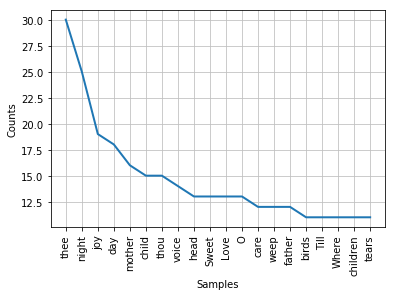

In [20]:
import matplotlib.pyplot as plt
noun =nltk.Text(noun)
noun.plot(20)
plt.show()

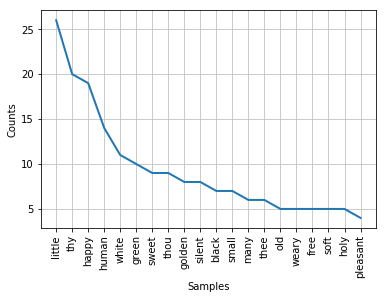

In [21]:
adj =nltk.Text(adj)
adj.plot(20)
plt.show()

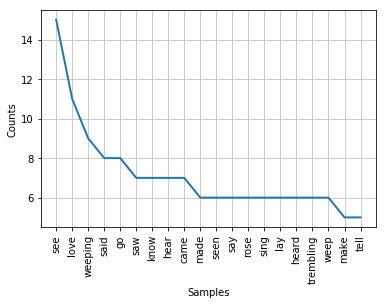

In [22]:
verb =nltk.Text(verb)
verb.plot(20)
plt.show()

## Word2Vec 과 T-sne로 단어 간 유사성 확인하기

In [23]:
import pandas as pd
data = pd.read_csv('nlp_data/hotel-reviews.csv')
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [26]:
doc = data['Description'].values
doc

array(["The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.",
       "I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the o

In [27]:
# \n\r 같은게 보이니까 제거해주자 \s 로 \t, \r, \n 같은 unicode whitespace character들을 잡을 수 있다
# For Unicode (str) patterns:
# Matches Unicode whitespace characters (which includes [ \t\n\r\f\v], and also many other characters, for example the non-breaking spaces mandated by typography rules in many languages). If the ASCII flag is used, only [ \t\n\r\f\v] is matched.
# For 8-bit (bytes) patterns:
# Matches characters considered whitespace in the ASCII character set; this is equivalent to [ \t\n\r\f\v].
import re
doc = [re.sub('\s',' ', review) for review in doc]
doc

["The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.",
 "I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my flo

In [32]:
# 특수문자도 제거
doc = [re.sub('[^a-zA-Z]', ' ', review) for review in doc]

['The room was kind of clean but had a VERY strong smell of dogs  Generally below average but ok for a overnight stay if you re not too fussy  Would consider staying again if the price was right  Breakfast was free and just about better than nothing ',
 'I stayed at the Crown Plaza April      April           The staff was friendly and attentive  The elevators are tiny  about    by      The food in the restaurant was delicious but priced a little on the high side  Of course this is Washington DC  There is no pool and little for children to do  My room on the fifth floor had two comfortable beds and plenty of space for one person  The TV is a little small by todays standards with a limited number of channels  There was a small bit of mold in the bathtub area that could have been removed with a little bleach  It appeared the carpets were not vacummed every day  I reported a light bulb was burned out  It was never replaced  Ice machines are on the odd numbered floors  but the one on my flo

In [34]:
# 실습코드에서는 word2vec model에 [tokens in a sentence]의 리스트를 넣었다
# 여기에서는 비록 여러개의 문장으로 구성되어있더라도 하나의 review에 비슷한 단어가 나올 것으로 가정하고 모델에 넣어보겠다
reviews = [nltk.word_tokenize(review) for review in doc]

# stopword 제거
# stops = set(stopwords.words("english"))
# reviews = [[w for w in review if not w in stops ] for review in reviews]

In [36]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(reviews,size=100, window=3,workers=4, min_count=5, sg=1)

model.init_sims(replace=True)

In [37]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


17917
[-0.00656634 -0.00021613  0.08488258 -0.05174481  0.0408295   0.04527495
 -0.12643819  0.0561237  -0.0277297  -0.17073937]


In [38]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

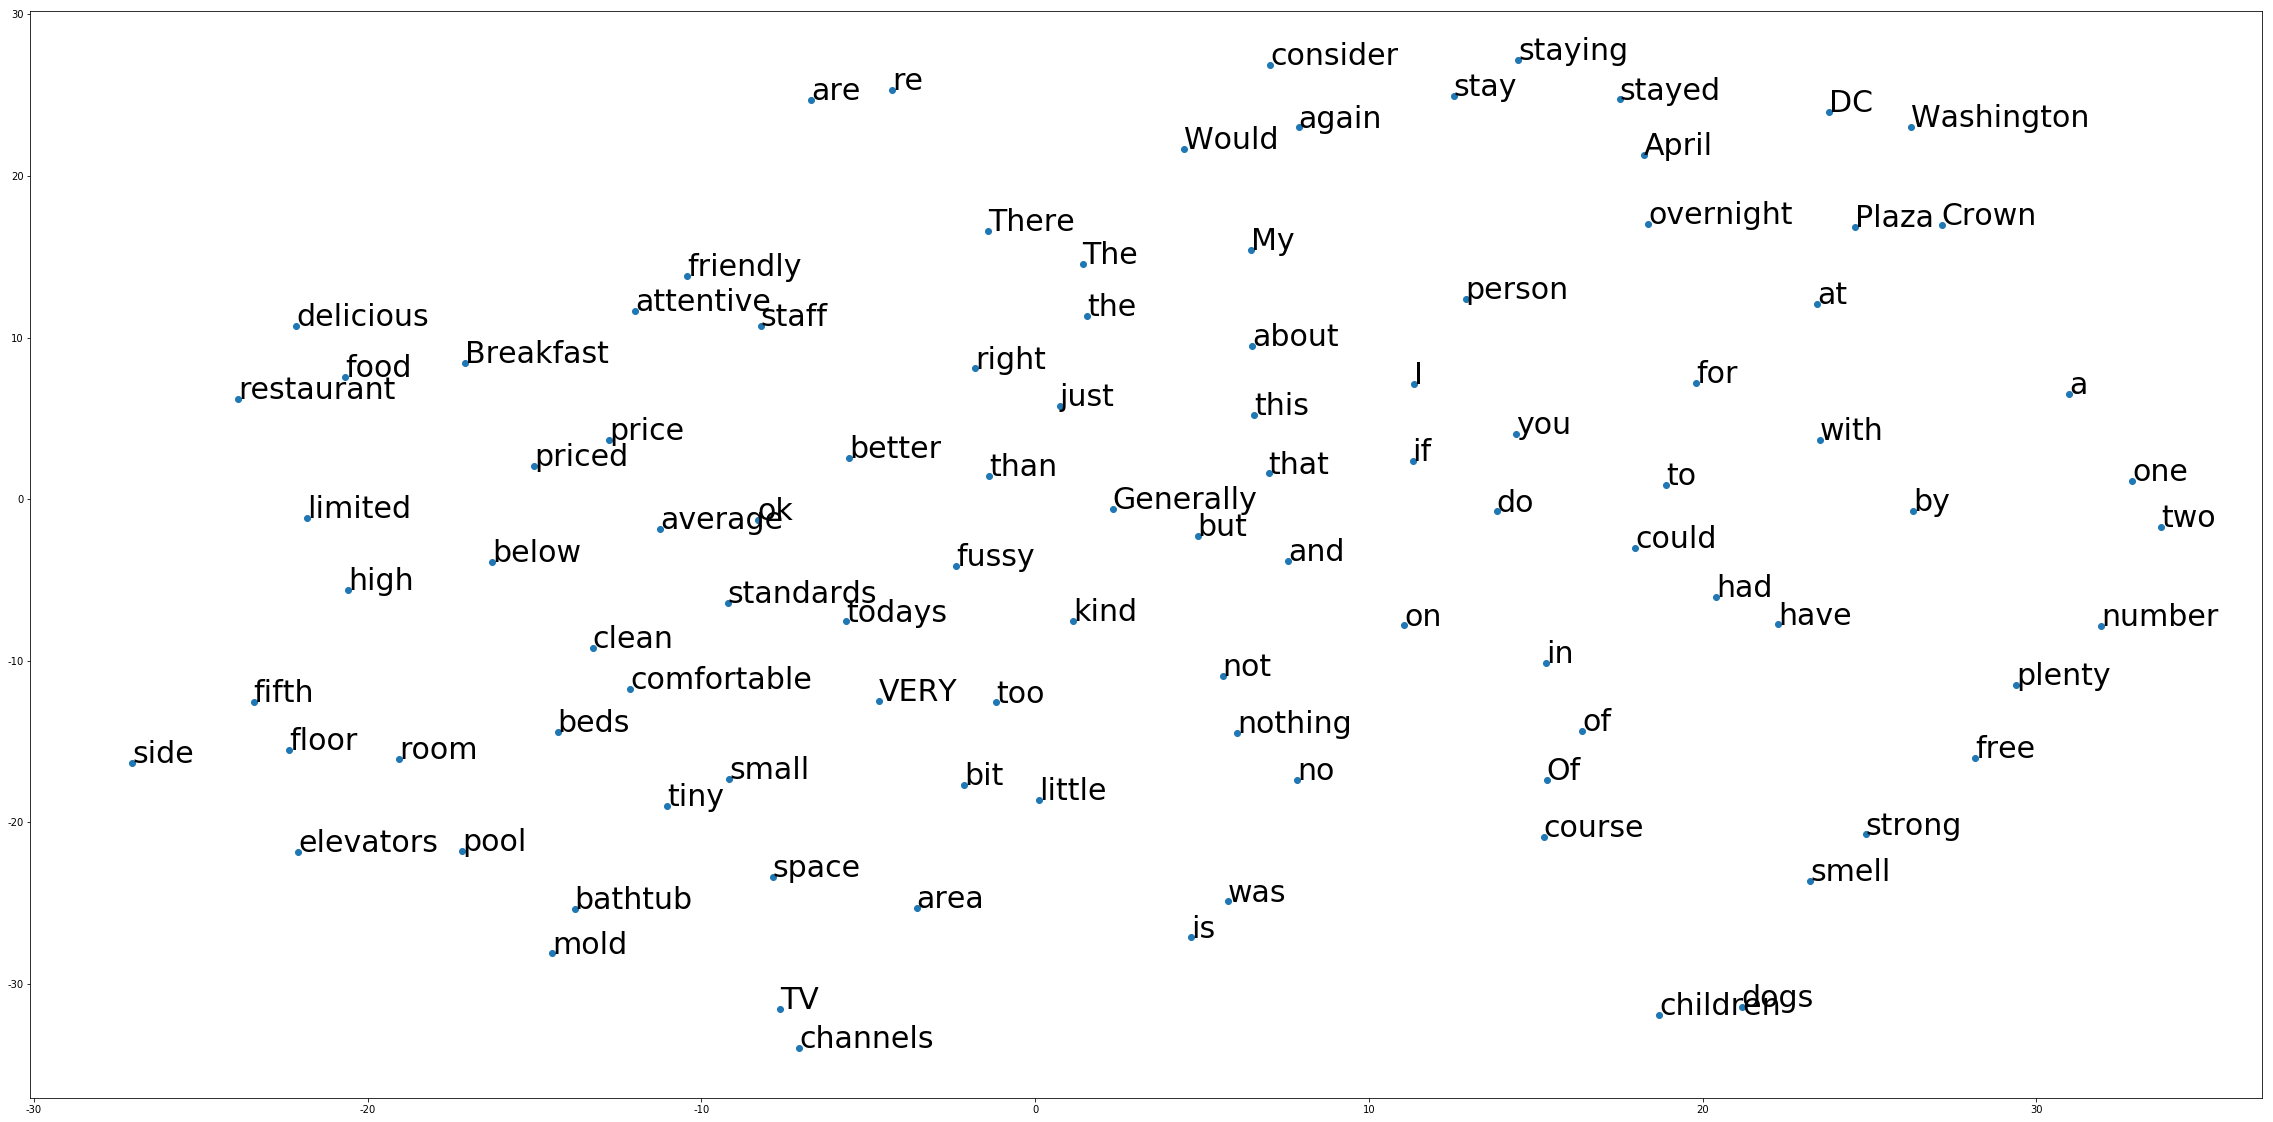

In [39]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()